# Materials Project

In [1]:
from mp_api.client import MPRester

api_key = "Dzhoeg8v6DxzxNhjhYjRosxnYIr5mT9i"

# Nos interesa la distribución de la energía por atomo, band-gap y la densidad
properties = ["material_id","energy_per_atom"]
properties_mat = ["material_id", "density"]

with MPRester(api_key) as mpr:
    mat = mpr.materials.search(fields=properties_mat)
    thermo_docs = mpr.thermo.search(fields=properties,thermo_types=["GGA_GGA+U"])

Retrieving MaterialsDoc documents:   0%|          | 0/154718 [00:00<?, ?it/s]

Accessing thermo data through MPRester.thermo is deprecated. Please use MPRester.materials.thermo instead.


Retrieving ThermoDoc documents:   0%|          | 0/154718 [00:00<?, ?it/s]

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df_mat = pd.DataFrame([material.__dict__ for material in mat])
df_thermo = pd.DataFrame([material.__dict__ for material in thermo_docs])

df = pd.merge(df_mat, df_thermo, on='material_id', how='inner')

df_long = df[["density","energy_per_atom"]]

df_long.to_csv("mat_doc.csv")

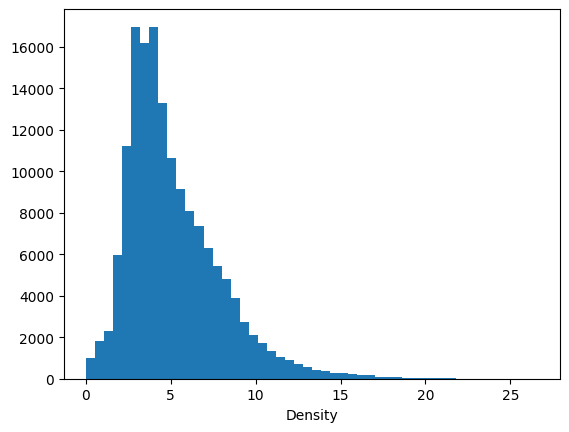

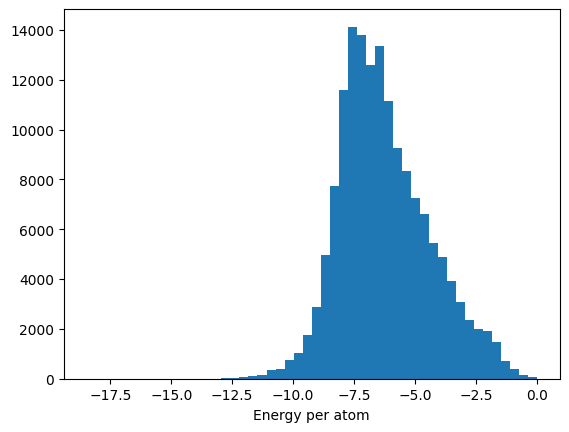

In [3]:
# Histogramas
plt.figure(1)
plt.hist(df_long["density"],bins=50)
plt.xlabel("Density")
plt.show()

plt.figure(2)
plt.hist(df_long["energy_per_atom"],bins=50)
plt.xlabel("Energy per atom")
plt.show()

In [4]:
df_long.describe()

,density,energy_per_atom
count,154718.000000,154718.000000
mean,5.140905,-6.265759
std,2.761268,1.862117
min,0.020144,-18.488548
25%,3.187203,-7.585424
50%,4.448522,-6.516871
75%,6.564731,-5.103024
max,26.581336,-0.000760
